#Recommendation with Correlation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# parsing and importing ratings data 
ratings = pd.read_csv("/content/drive/MyDrive/PortAuPrince_Roads/BX-Book-Ratings.csv",sep=";",encoding="latin-1",error_bad_lines=False)


In [ ]:
books = pd.read_csv("/content/drive/MyDrive/PortAuPrince_Roads/BX-Books.csv",sep=";",encoding="latin-1",error_bad_lines=False)
books.head()
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [ ]:
users = pd.read_csv("/content/drive/MyDrive/PortAuPrince_Roads/BX-Users.csv",sep=";",encoding="latin-1",error_bad_lines=False)
users.columns = ['userID', 'Location', 'Age']

In [ ]:
l = [5,6,7,8,9]
l1 = [9,8,7,6,5]
sorted(l,reverse=True)==l1

True

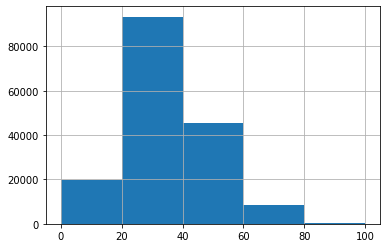

In [ ]:
users.Age.hist(bins=[0,20,40,60,80,100])

In [ ]:
rating_count = ratings.groupby('ISBN').count()['Book-Rating']
rating_count = pd.DataFrame(rating_count)
max_rating = rating_count.idxmax()
rating_count.loc[max_rating]
rating_sorted = rating_count.sort_values('Book-Rating',ascending=False)
rating_sorted[:5]

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [ ]:
top_five_rating = np.array(rating_sorted[:5].index)
top_five_rating

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516'], dtype=object)

In [ ]:
most_rated = pd.DataFrame(top_five_rating,index=np.arange(5),columns = ['ISBN'])
most_rated_books = pd.merge(most_rated,books,on="ISBN")
most_rated_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [ ]:
rated = pd.merge(most_rated_books,ratings)
rated.groupby('ISBN').sum()/(rated.groupby('ISBN').count())
rated

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,User-ID,Book-Rating
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,276925,0
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,276939,0
2,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,276954,0
3,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277042,2
4,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277157,0
...,...,...,...,...,...,...,...,...,...,...
6130,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,273030,10
6131,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,274301,0
6132,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,275205,0
6133,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,275678,10


In [ ]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_sorted = average_rating.sort_values('ratingCount',ascending=False)
average_sorted.head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [ ]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
counts1 = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts[counts >= 100].index)]
ratings

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


to make calculation easy and fast and more meningfull
,I does not including users who have rated less than 200 books and books which have less rating count than 100



In [ ]:
count1 = ratings['User-ID'].value_counts()
new_ratings = ratings[ratings['User-ID'].isin(count1[count1>=200].index)]
count2 = ratings['Book-Rating'].value_counts()
new_ratings = ratings[ratings['Book-Rating'].isin(count2[count2>=100].index)]
new_ratings
# (ratings['Book-Rating'].isin(count2[count2>=100].index)).value_counts()
# ratings['User-ID'].isin(count1[count1>=200].index).value_counts()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [ ]:
ratings_pivot = ratings.pivot(index='User-ID', columns='ISBN',values='Book-Rating')
ratings_pivot
User = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.info()

(905, 207699)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 254 to 278418
Columns: 207699 entries,  0330299891 to Ô½crosoft
dtypes: float64(207699)
memory usage: 1.4 GB


In [ ]:
most_rated.loc[1]
bones = ratings_pivot["0316666343"]
corr_bones = ratings_pivot.corrwith(bones)
corr_bones.dropna(inplace=True)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
corr_summary = pd.DataFrame(corr_bones,columns=['PearsonR'])
corr_summary = corr_summary.join(average_rating['ratingCount'])
top_10 = corr_summary[corr_summary['ratingCount']>=300].sort_values('PearsonR',ascending=False).head(10)


In [ ]:

arr = np.array(top_10.index)
highly_corr_books = pd.DataFrame(arr,index=np.arange(10),columns=["ISBN"])
books_corr = pd.merge(highly_corr_books ,books,on="ISBN")
books_corr[:3]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
2,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...


# KNN and pivot table

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD

Using matplotlib backend: agg


In [ ]:
books = pd.read_csv("/content/drive/MyDrive/PortAuPrince_Roads/BX-Books.csv",sep=";",encoding="latin-1",error_bad_lines=False)
# books.head()
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv("/content/drive/MyDrive/PortAuPrince_Roads/BX-Users.csv",sep=";",encoding="latin-1",error_bad_lines=False)
users.columns = ['userID', 'Location', 'Age']
# parsing and importing ratings data 
ratings = pd.read_csv("/content/drive/MyDrive/PortAuPrince_Roads/BX-Book-Ratings.csv",sep=";",encoding="latin-1",error_bad_lines=False)
ratings.columns = ['userID',"ISBN","bookRating"]

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:27

In [ ]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
combine_books = pd.merge(ratings,books,on="ISBN")
columns = ['bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_books.drop(columns,axis=1,inplace=True)


In [ ]:
combine_books = combine_books.dropna(axis=0,subset=['bookTitle'])
book_ratingcount = combine_books.groupby('bookTitle')['bookRating'].count().reset_index().rename(columns={'bookRating':"totalRatingCount"})
book_ratingcount

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
total_rating = combine_books.merge(book_ratingcount)
total_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
book_ratingcount['totalRatingCount'].describe()


count    241071.000000
mean          4.277312
std          16.738685
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: totalRatingCount, dtype: float64

In [ ]:
popularity_thershold = 50
popular_books = total_rating.query("totalRatingCount >= @popularity_thershold")
popular_books.head()
popular_books['totalRatingCount'].describe()


count    288740.000000
mean        220.494673
std         279.043227
min          50.000000
25%          79.000000
50%         135.000000
75%         258.000000
max        2502.000000
Name: totalRatingCount, dtype: float64

In [ ]:
book_ratingcount.head()
total_rating.head()
usa_users= users[users['Location']=="nyc, new york, usa"]
users['Location']
india_users = users[users['Location']=="delhi, delhi, india"]
# data = users['Location'].str.split(expand=True)
# data[data[2]=="canada"]
canada_users = users[users['Location']=="brampton, ontario, canada"]
india_users.size,usa_users.size,canada_users.size



0       A Light in the Storm: The Civil War Diary of ...
1                                  Always Have Popsicles
2                   Apple Magic (The Collector's series)
3       Ask Lily (Young Women of Faith: Lily Series, ...
4       Beyond IBM: Leadership Marketing and Finance ...
                             ...                        
995    23 Shades of Black (Filomena Buscarsela Myster...
996                   2367. Experiment Hex. ( Ab 14 J.).
997    237 Intimate Questions Every Woman Should Ask ...
998    24 Days: How Two Wall Street Journal Reporters...
999    24 Essential Lessons for Investment Success: L...
Name: bookTitle, Length: 1000, dtype: object

In [ ]:
users.head(3)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [ ]:
users.get_indexer(ratings.user).astype(np.intc)
users.set_index('user')
users.set_index('userID', inplace=True)

In [ ]:
# dir(users)

In [ ]:
combined = popular_books.merge(users)
combined.drop("Age",axis=1,inplace=True)
combined 
us_ind_can_users = combined[combined['Location'].str.contains("usa|canada|india")]
us_ind_can_users

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),249,"cincinnati, ohio, usa"
3,2313,0679745580,8,In Cold Blood (Vintage International),55,"cincinnati, ohio, usa"
4,2313,0399146431,5,The Bonesetter's Daughter,384,"cincinnati, ohio, usa"
...,...,...,...,...,...,...
288735,108962,0060176806,8,Love in Another Town,68,"el cajon, california, usa"
288736,116812,0060176806,8,Love in Another Town,68,"fredericton, new brunswick, canada"
288737,121442,0060176806,5,Love in Another Town,68,"north little rock, arkansas, usa"
288738,159856,0060176806,3,Love in Another Town,68,"new maryland, new brunswick, canada"


In [ ]:
us_ind_can_users_pivot = us_ind_can_users.pivot_table(index="bookTitle",columns="userID",values="bookRating")

In [ ]:
us_ind_can_users_pivot.fillna(0,inplace=True)
us_ind_can_users_pivot

userID,8,9,14,16,17,23,26,32,39,42,44,51,56,67,75,77,95,97,99,114,125,132,133,135,144,165,169,178,185,193,199,207,224,226,228,230,232,243,244,254,...,278550,278552,278556,278561,278582,278586,278601,278633,278641,278645,278648,278653,278663,278672,278683,278694,278723,278732,278740,278769,278771,278773,278781,278786,278796,278798,278800,278807,278813,278819,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
bookTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric="cosine",algorithm ="brute")
model.fit(us_ind_can_users_pivot)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(us_ind_can_users_pivot.shape[0])
query_index
dist,neigh = model.kneighbors(np.array(us_ind_can_users_pivot.iloc[query_index,:]).reshape(1,-1),n_neighbors=6)
for i in range(0,len(dist.flatten())):
  if i==0:
    print("""Recommendations for {0}\n """.format(us_ind_can_users_pivot.index[query_index]))
  else:
    print("{0}: {1} with distances {2} ".format(i,us_ind_can_users_pivot.index[neigh.flatten()[i]],dist.flatten()[i]))


Recommendations for The Shell Seekers (Shell Seekers)
 
1: Then Came Heaven with distances 0.8992214002258104 
2: Here on Earth with distances 0.9179868685936201 
3: Their Eyes Were Watching God with distances 0.9217048706702161 
4: Local Girls with distances 0.9236313709704659 
5: Pleading Guilty with distances 0.9242366800846887 


In [ ]:
exp = (us_ind_can_users_pivot[us_ind_can_users_pivot.index=="The Green Mile: Coffey's Hands (Green Mile Series)"])
dist,neigh = model.kneighbors(np.array(exp).reshape(1,-1),n_neighbors=6)
for i in range(0,len(dist.flatten())):
  if i==0:
    print("""Recommendations for {0}\n """.format(us_ind_can_users_pivot.index[query_index]))
  else:
    print("{0}: {1} with distances {2} ".format(i,us_ind_can_users_pivot.index[neigh.flatten()[i]],dist.flatten()[i]))


Recommendations for The Shell Seekers (Shell Seekers)
 
1: The Green Mile: Night Journey (Green Mile Series) with distances 0.26063737394209996 
2: The Green Mile: The Mouse on the Mile (Green Mile Series) with distances 0.29116237544042467 
3: The Green Mile: The Bad Death of Eduard Delacroix (Green Mile Series) with distances 0.2959542871302775 
4: The Two Dead Girls (Green Mile Series) with distances 0.30596709534565514 
5: The Green Mile: Coffey on the Mile (Green Mile Series) with distances 0.37646848777592923 
